In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

html=urlopen("https://www.weather.go.kr/weather/climate/past_cal.jsp?stn=108&yy=2019&mm=1&x=31&y=15&obs=1")
bsObject=bs(html,"html.parser")

print(bsObject)

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<title>일별자료 &gt; 과거자료 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="shortcut icon"/>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="apple-touch-icon-precomposed"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/share/css/base.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/common.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-layout.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/component.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/add_2018.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-obs.css?ver=20191226" rel="stylesheet" type="text/css"/>
<script src="/share/js/jquery-1.7.1.min.js"></script>
<script src="/share/js/weath

In [14]:
import requests
import calendar
import datetime

In [15]:
data = []
now = datetime.datetime.now()
nowyear = now.strftime('%Y')
nowmonth = now.strftime('%m')

In [17]:
for y in range(2019,2020):
    print('y : '+str(y) + 'year : ' + str(nowyear))
    if str(y)==str(nowyear):
        monthrange = int(nowmonth)+1
    else:
        monthrange = 13
        
    for m in range(1,monthrange):
        response = requests.get('http://www.kma.go.kr/weather/climate/past_cal.jsp?stn=108&yy='+str(y)+'&mm='+str(m)+'&obs=1')
        soup = bs(response.content, 'html.parser')
        table = soup.find('table', {'class': 'table_develop'})  

        count = 0
        point = [''] * 7
        pointt = [''] * 7
        fstr = [''] * 7
        tstr = [''] * 7
        mstr = [''] * 7
        estr = [''] * 7
        temp = [''] * 7
        temptop = [''] * 7
        tempmin = [''] * 7
        rain = [''] * 7
        
        for tr in table.find_all('tr'):
            tds = list(tr.find_all('td'))
    
            if tds:
                for i in range(0,7):
                    point[i] = tds[i].text
        
                if count%2!=0:
                    for j in range(0,7):
                        pointt[j] = point[j].translate({ord('일'):''})
            
                if count%2==0:
                    for k in range(0,7):
                        fstr[k] = point[k].find('최고기온')
                        tstr[k] = point[k].find('최저기온')
                        mstr[k] = point[k].find('평균운량')
                        estr[k] = point[k].find('일강수량')
                        temp[k] = point[k][5:fstr[k]].translate({ord('℃'):''})
                        temptop[k] = point[k][fstr[k]+5:tstr[k]].translate({ord('℃'):''})
                        tempmin[k] = point[k][tstr[k]+5:mstr[k]].translate({ord('℃'):''})
                        rain[k] = point[k][estr[k]+5:].translate({ord(' '):'',ord('-'):'0.0',ord('m'):''})
                
                    if pointt[0]=='\xa0' or temp[0]=='':
                        sun = ""
                    else:
                        sun = str(y)+'-'+str(m)+'-'+pointt[0]+' '+temp[0]+' '+temptop[0]+' '+tempmin[0]+' '+rain[0]
                        data.append([sun])
            
                    if pointt[1]=='\xa0' or temp[1]=='':
                        mon = ""
                    else:
                        mon = str(y)+'-'+str(m)+'-'+pointt[1]+' '+temp[1]+' '+temptop[1]+' '+tempmin[1]+' '+rain[1]
                        data.append([mon])
            
                    if pointt[2]=='\xa0' or temp[2]=='':
                        tue = ""
                    else:
                        tue = str(y)+'-'+str(m)+'-'+pointt[2]+' '+temp[2]+' '+temptop[2]+' '+tempmin[2]+' '+rain[2]
                        data.append([tue])
            
                    if pointt[3]=='\xa0' or temp[3]=='':
                        wed = ""
                    else:
                        wed = str(y)+'-'+str(m)+'-'+pointt[3]+' '+temp[3]+' '+temptop[3]+' '+tempmin[3]+' '+rain[3]
                        data.append([wed])
            
                    if pointt[4]=='\xa0' or temp[4]=='':
                        thu = ""
                    else:
                        thu = str(y)+'-'+str(m)+'-'+pointt[4]+' '+temp[4]+' '+temptop[4]+' '+tempmin[4]+' '+rain[4]
                        data.append([thu])
            
                    if pointt[5]=='\xa0' or temp[5]=='':
                        fri = ""
                    else:
                        fri = str(y)+'-'+str(m)+'-'+pointt[5]+' '+temp[5]+' '+temptop[5]+' '+tempmin[5]+' '+rain[5]
                        data.append([fri])
            
                    if pointt[6]=='\xa0' or temp[6]=='':
                        sat = ""
                    else:
                        sat = str(y)+'-'+str(m)+'-'+pointt[6]+' '+temp[6]+' '+temptop[6]+' '+tempmin[6]+' '+rain[6]
                        data.append([sat])
            
                    print(sun)
                    print(mon)
                    print(tue)
                    print(wed)
                    print(thu)
                    print(fri)
                    print(sat)
            count+=1


y : 2019year : 2020


2019-1-1 -5.0 -0.6 -8.2 0.0
2019-1-2 -4.9 0.2 -8.8 0.0
2019-1-3 -3.5 3.2 -8.4 0.0
2019-1-4 -1.1 4.1 -6.2 0.0
2019-1-5 -2.8 1.1 -5.5 0.0
2019-1-6 -2.8 2.7 -6.3 0.0
2019-1-7 -1.9 3.1 -6.2 0.0
2019-1-8 -3.5 0.5 -7.2 0.0
2019-1-9 -4.7 1.3 -9.4 0.0
2019-1-10 -0.6 3.0 -4.5 0.0
2019-1-11 2.4 7.2 -0.4 0.0
2019-1-12 2.8 8.0 -0.6 0.0
2019-1-13 1.2 7.6 -3.0 0.0
2019-1-14 1.4 5.3 -2.4 0.0
2019-1-15 -1.7 2.6 -7.2 0.0
2019-1-16 -5.2 -1.1 -10.1 0.0
2019-1-17 -0.3 4.0 -3.2 0.0
2019-1-18 0.6 6.7 -4.6 0.0
2019-1-19 3.6 8.5 0.0 0.0
2019-1-20 -1.4 4.0 -5.5 0.0
2019-1-21 -1.2 4.2 -6.7 0.0
2019-1-22 1.7 7.1 -3.3 0.0
2019-1-23 2.0 7.0 -0.8 0.0
2019-1-24 0.1 6.5 -4.6 0.0
2019-1-25 -1.2 2.6 -3.8 0.0
2019-1-26 -2.5 2.4 -6.5 0.0
2019-1-27 -0.1 5.1 -6.6 0.0
2019-1-28 1.2 4.5 -2.4 0.0
2019-1-29 -0.2 7.0 -5.6 0.0
2019-1-30 1.8 6.6 -2.8 0.0
2019-1-31 -2.0 2.3 -6.2 0.0







2019-2-1 -2.1 2.8 -7.4 0.3
2019-2-2 1.4 6.1 -3.2 0.0
2019-2-3 3.3 4.9 2.0 16.0
2019-2-4 -0.6 3.0 -3.3 0.0
2019-2-5 2.8 10






2019-11-1 14.9 20.5 11.4 0.0
2019-11-2 13.6 18.7 8.3 0.0
2019-11-3 14.7 22.1 9.4 0.0
2019-11-4 13.8 20.3 9.2 0.0
2019-11-5 12.4 18.4 8.4 0.0
2019-11-6 11.0 16.5 6.3 0.0
2019-11-7 9.2 13.6 5.0 0.0
2019-11-8 6.8 13.0 1.1 0.0
2019-11-9 9.5 17.2 3.5 0.0
2019-11-10 10.0 15.3 6.2 11.8
2019-11-11 11.2 15.1 7.9 1.1
2019-11-12 9.3 14.5 4.8 0.0
2019-11-13 7.2 11.3 3.0 7.5
2019-11-14 1.3 5.0 -2.5 0.0
2019-11-15 5.6 7.6 1.4 18.8
2019-11-16 6.8 12.7 3.8 0.0
2019-11-17 8.3 10.5 5.6 21.1
2019-11-18 4.6 12.7 0.4 14.7
2019-11-19 0.2 4.0 -3.5 0.0
2019-11-20 0.5 6.3 -4.6 0.0
2019-11-21 4.2 9.0 -2.3 0.0
2019-11-22 9.7 17.3 3.0 0.0
2019-11-23 12.1 17.7 7.7 0.0
2019-11-24 9.8 15.6 4.6 3.8
2019-11-25 1.9 6.0 -1.2 0.0
2019-11-26 6.6 13.7 1.2 0.0
2019-11-27 3.1 6.8 0.3 0.0
2019-11-28 3.5 10.4 -0.6 0.0
2019-11-29 1.5 6.9 -3.4 0.0
2019-11-30 4.1 9.3 -1.4 0.0
2019-12-1 4.6 6.2 2.3 3.3
2019-12-2 -0.1 2.8 -3.2 0.0
2019-12-3 0.5 4.2 -5.0 0.6
2019-12-4 2.0 7.2 -2.0 0.0
2019-12-5 -4.4 -0.2 -8.5 0.0
2019-12-6 -5.9

# 이거 긁어서 txt파일로 만듦

In [26]:
import pandas as pd
weader=pd.read_csv("C:/Users/hyeyo/AppData/Local/Programs/Python/Python37-32/기상청.txt", sep=' ')

In [27]:
weader.head()

,날짜,평균기온,최고기온,최저기온,평균운량
0,2019-1-1,-5.0,-0.6,-8.2,0.0
1,2019-1-2,-4.9,0.2,-8.8,0.0
2,2019-1-3,-3.5,3.2,-8.4,0.0
3,2019-1-4,-1.1,4.1,-6.2,0.0
4,2019-1-5,-2.8,1.1,-5.5,0.0


In [40]:
a=weader.loc[weader['날짜'].str.contains('2019-1-',na=False)].mean()
b=weader.loc[weader['날짜'].str.contains('2019-2-',na=False)].mean()
c=weader.loc[weader['날짜'].str.contains('2019-3-',na=False)].mean()
d=weader.loc[weader['날짜'].str.contains('2019-4-',na=False)].mean()
e=weader.loc[weader['날짜'].str.contains('2019-5-',na=False)].mean()
f=weader.loc[weader['날짜'].str.contains('2019-6-',na=False)].mean()
g=weader.loc[weader['날짜'].str.contains('2019-7-',na=False)].mean()
h=weader.loc[weader['날짜'].str.contains('2019-8-',na=False)].mean()
i=weader.loc[weader['날짜'].str.contains('2019-9-',na=False)].mean()
j=weader.loc[weader['날짜'].str.contains('2019-10-',na=False)].mean()
k=weader.loc[weader['날짜'].str.contains('2019-11-',na=False)].mean()
l=weader.loc[weader['날짜'].str.contains('2019-12-',na=False)].mean()

In [87]:
w2=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l], axis=1)
w2

,0,1,2,3,4,5,6,7,8,9,10,11
평균기온,-0.896774,0.985714,7.093548,12.120000,19.419355,22.503333,25.877419,27.190323,22.643333,16.370968,7.580000,1.416129
최고기온,4.087097,6.046429,12.445161,17.640000,25.641935,27.706667,30.087097,31.635484,27.100000,21.767742,12.933333,5.274194
최저기온,-5.064516,-3.217857,2.745161,7.176667,13.729032,18.060000,22.683871,23.590323,18.963333,11.800000,3.100000,-2.603226
평균운량,0.000000,0.850000,0.864516,1.576667,1.219355,2.480000,6.270968,6.145161,4.660000,1.790323,2.626667,0.729032


In [117]:
w2.columns=[' ','1','2','3','4','5','6','7','8','9','10','11','12']

In [118]:
from pandas import DataFrame as dt

In [119]:
import matplotlib

In [120]:
from matplotlib import pyplot as plt


In [121]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [122]:
w4=w2.iloc[0]
pd.DataFrame(w4)
w4=w4.drop(w4.index[0])
dt(w4)

,0
1,-0.896774
2,0.985714
3,7.09355
4,12.12
5,19.4194
6,22.5033
7,25.8774
8,27.1903
9,22.6433
10,16.371


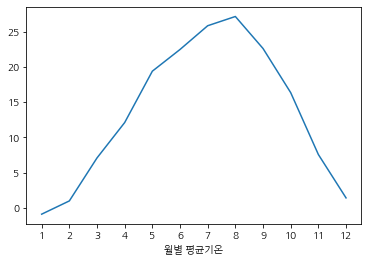

In [123]:
plt.plot(w4)
plt.xlabel('월별 평균기온')
plt.show()